<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">

# <center> **08. An application of deep learning!** </center>


This guide uses tf.keras, a high-level API to build and train models in TensorFlow.


In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "course-AI/la-conga-machinelearning-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

In [ ]:
#@title 2. LOAD LIB { display-mode: "form" }
#@markdown Here is important to change to GPU  

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.8.2


## **An example with image classification** 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/imageClassification.jpeg" alt="Drawing" style="width:1700px;">

## **MNIST dataset**

The well know classification: MNIST dataset with 60000 images for training and 10000 for test. Images were taken from American Census Bureau employees and American high school students.

**Note:** This original dataset is much larger than previous one!

In [ ]:
#@title **code** Download original Mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(tf.__version__)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
2.8.2


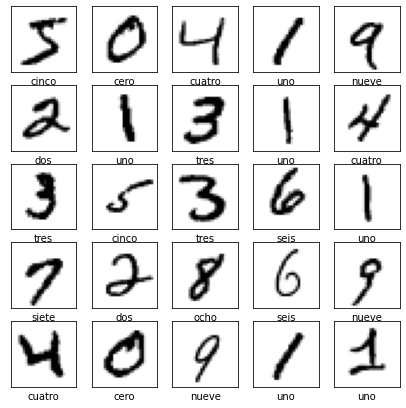

In [ ]:
#@title **code** To plot some examples
class_names = ['cero','uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve']
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [ ]:
#@title **code** To normalize and prepare data
x_train = x_train.reshape([-1, 28, 28, 1])
x_test = x_test.reshape([-1, 28, 28, 1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# **2. DNN: The engineering solution: hidden layers and activation functions**
<a name="eje2"></a>

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/ANNs.gif" style="width:400px;">

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/dl2.jpg" style="width:300px;">



In [ ]:
#@title **code** Coding a DNN from Keras

model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[28, 28, 1]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#@title **code** Training a DNN
model.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.6473 - accuracy: 0.8362
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3345 - accuracy: 0.9055
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2858 - accuracy: 0.9191
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2555 - accuracy: 0.9282
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2330 - accuracy: 0.9345


# **4. DL: Testing: Forward propagation** <a name="eje4"></a>

Once we have trained our DNN, we follow a classical evaluation of a machine learning dataset. In such case we will to evaluate the accuracy:

In [ ]:
#@title **code** Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2154 - accuracy: 0.9394
Test accuracy: 0.9394000172615051


see more deeply on predictions

In [ ]:
#@title **code** How work predictions?
predictions = model.predict(x_test)
print(predictions[5125])
print("valor predicho:",  np.argmax(predictions[5125]), "max prob: ", np.max(predictions[5125]),
      "ground truth: ", y_test[5125] )

[4.2475534e-05 1.1075720e-06 9.9927300e-01 7.3527190e-05 1.3532033e-07
 1.6135245e-05 1.7446428e-05 2.8386687e-06 5.4674887e-04 2.6624555e-05]
valor predicho: 2 max prob:  0.999273 ground truth:  2


Now, we can evaluate single examples, even new examples

the number predicted is:  2


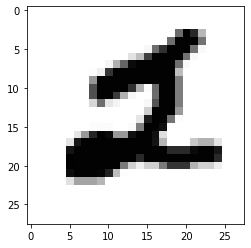

In [ ]:
#@title **code** individual predictions
img_rows, img_cols =28, 28
image_index = 5125
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print("the number predicted is: ", pred.argmax())

<Figure size 432x288 with 0 Axes>

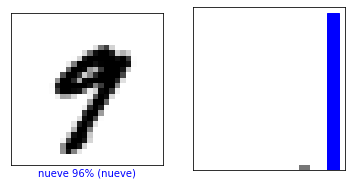

In [ ]:
#@title **code** Performance on predictions
%run code/dl_plot.py
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

<Figure size 432x288 with 0 Axes>

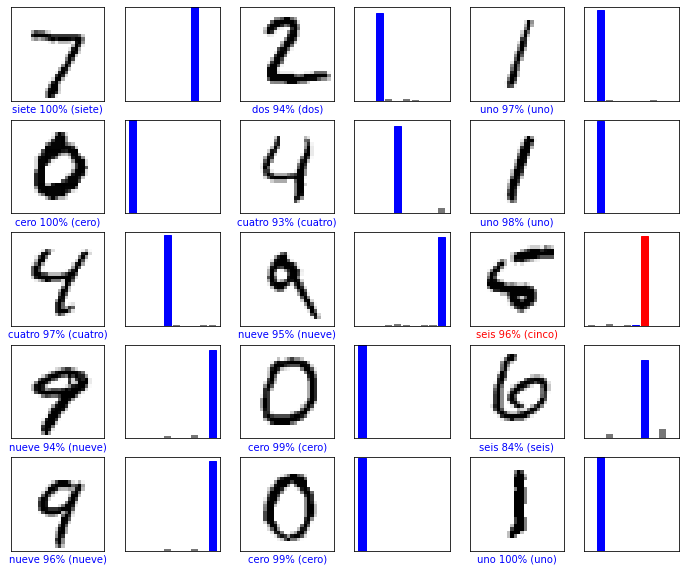

In [ ]:
#@title **code** Batch of predictions
%run notes/dl_plot.py
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

(10000, 10)
matrix de confusión en test
 [[ 961    0    2    2    0    4    7    1    2    1]
 [   0 1113    1    3    1    1    4    2   10    0]
 [   7    3  950   12   11    4    9   12   21    3]
 [   2    0   12  952    0   13    2   11   15    3]
 [   1    2    7    1  929    0    8    2    3   29]
 [   8    2    5   31    8  794   14    5   17    8]
 [  10    3    4    0   12    8  917    1    3    0]
 [   1   10   22    5    6    0    0  962    2   20]
 [   6    6    5   19    9   14   10    9  892    4]
 [  11    6    1   13   32    5    1   14    2  924]]
verifica número de imágenes en total por fila
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


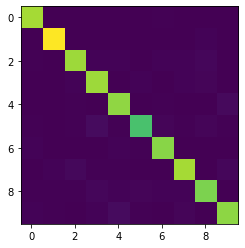

In [ ]:
#@title **code** confussion matrices to understand results
from sklearn.metrics import confusion_matrix
print(predictions.shape)
labels_pred = np.argmax(predictions, axis=1)
cm_test = confusion_matrix(y_test, labels_pred)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))
plt.imshow(cm_test)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


1. Change configuration with two different activation function: tanh, elu
2. Built a deep neural network with:
    - one hidden layer of 512 neurons and relu activation
    - one hidden layers of 128. 
3. Try with a more challenge dataset: for instance: **fashion mnist**



In [ ]:
#@title **code student**
#1. point


print('Test accuracy:', test_acc)

In [ ]:
#@title **code student**
#2. point


print('Test accuracy:', test_acc)

# **References**

[1] Tensorflow: https://www.tensorflow.org/


[2] Playground: http://playground.tensorflow.org/


[3] Udacity deep learning course: https://classroom.udacity.com/courses/ud730

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">